## I. Perkenalan
Nama        : Fadhilah Amani Alam Aulia

Batch       : 15

Dataset     : Credit card default

Objective   : Memprediksi `default_payment`

Query:

    SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month FROM `bigquery-public-data.ml_datasets.credit_card_default` LIMIT 29955

## II. Import Libraries

In [1]:
# Mengimport library yang dibutuhkan

import joblib
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from tabulate import tabulate

## III. Data Loading

In [2]:
# Mengakses dataset

data = pd.read_csv('h8dsft_P1M1_fadhilah_amani_alam_aulia.csv')
data

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


In [3]:
# Melihat 10 baris pertama pada dataset

data.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
5,20000.0,1,1,2,29.0,0.0,0.0,2.0,0.0,0,...,17368.0,17959.0,19023.0,3170.0,0.0,1000.0,1000.0,3000.0,0.0,0
6,220000.0,1,1,2,38.0,0.0,0.0,0.0,0.0,0,...,198681.0,202479.0,206221.0,7705.0,9656.0,7189.0,7404.0,7490.0,7517.0,0
7,50000.0,1,1,1,42.0,0.0,0.0,0.0,0.0,0,...,29664.0,29057.0,29083.0,1850.0,1507.0,1100.0,1200.0,1116.0,2900.0,0
8,170000.0,1,1,1,41.0,0.0,0.0,0.0,0.0,0,...,76149.0,84474.0,92400.0,3200.0,6000.0,5000.0,10000.0,10000.0,780.0,0
9,50000.0,2,1,2,24.0,0.0,0.0,2.0,0.0,0,...,32140.0,32216.0,31482.0,5350.0,0.0,1085.0,2000.0,1226.0,2415.0,0


In [4]:
# Melihat 10 baris terakhir pada dataset

data.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,160000.0,1,2,1,40.0,-1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,0.0,2941.0,0.0,0.0,0.0,0.0,0.0,0
2956,260000.0,2,2,2,26.0,-1.0,-1.0,-2.0,-2.0,-2,...,-920.0,-1236.0,-1552.0,288.0,1236.0,316.0,316.0,316.0,316.0,0
2957,200000.0,2,1,1,49.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,0.0,103.0,0.0,0.0,0.0,225.0,0
2958,90000.0,2,1,1,44.0,-1.0,-1.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2959,80000.0,2,2,2,45.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,0.0,83750.0,0.0,0.0,0.0,0.0,0.0,0
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1
2964,20000.0,2,1,2,24.0,-1.0,-1.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [5]:
# Mengganti nama kolom 'sex' menjadi 'gender' dan 'default_payment_next_month' menjadi 'default_payment'

data.rename(columns={'sex': 'gender', 'default_payment_next_month': 'default_payment'}, inplace=True)
data

,limit_balance,gender,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


In [6]:
# Mengecek ukuran dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   limit_balance    2965 non-null   float64
 1   gender           2965 non-null   int64  
 2   education_level  2965 non-null   int64  
 3   marital_status   2965 non-null   int64  
 4   age              2965 non-null   float64
 5   pay_0            2965 non-null   float64
 6   pay_2            2965 non-null   float64
 7   pay_3            2965 non-null   float64
 8   pay_4            2965 non-null   float64
 9   pay_5            2965 non-null   int64  
 10  pay_6            2965 non-null   int64  
 11  bill_amt_1       2965 non-null   float64
 12  bill_amt_2       2965 non-null   float64
 13  bill_amt_3       2965 non-null   float64
 14  bill_amt_4       2965 non-null   float64
 15  bill_amt_5       2965 non-null   float64
 16  bill_amt_6       2965 non-null   float64
 17  pay_amt_1     

Berdasarkan data di atas, diketahui bahwa dataset ini terdiri dari 2965 baris dan 24 kolom. Dataset ini terdiri dari dua tipe data, yaitu float64 dan int64, dan memakan memori sebesar 556.1 Kb.

## IV. Exploratory Data Analysis (EDA)

In [7]:
# Menampilkan nilai data unique di setiap kolom

for col in data:
  print(col, data[col].unique())

limit_balance [ 50000. 110000. 270000. 130000.  20000. 220000. 170000. 120000. 230000.
 360000.  60000. 100000. 150000.  30000. 320000. 200000. 500000.  80000.
 140000.  70000. 350000.  40000.  90000. 400000. 180000. 240000. 300000.
 330000.  10000. 420000. 250000. 260000. 380000. 210000. 470000. 460000.
 290000. 160000. 780000. 310000. 280000. 390000. 530000. 340000. 510000.
 410000. 190000. 480000. 680000. 490000. 430000. 370000. 440000. 700000.
 560000. 750000. 450000. 800000. 620000.]
gender [1 2]
education_level [1 2 3 5 4 6 0]
marital_status [2 1 3 0]
age [39. 29. 36. 45. 24. 38. 42. 41. 27. 37. 52. 34. 23. 25. 35. 43. 22. 31.
 28. 32. 26. 49. 33. 60. 46. 58. 30. 48. 50. 40. 62. 55. 51. 44. 47. 65.
 66. 69. 21. 61. 56. 53. 54. 57. 63. 64. 67. 59. 68.]
pay_0 [ 0. -1.  2.  1.  3. -2.  4.  5.  6.  7.  8.]
pay_2 [ 0.  2. -2.  3.  4.  5.  6.  7.  1. -1.]
pay_3 [ 0.  2. -1. -2.  3.  5.  6.  7.  4.]
pay_4 [ 0.  2. -1.  3.  5. -2.  4.  6.  7.  8.]
pay_5 [ 0  2  3  4 -1 -2  5  6  7]
pay_6

Pada dataset ini, kolom-kolom kategori telah diisi dengan nilai numerik. Berikut ini merupakan penjelasan dari nilai data pada kolom kategori:
- Kolom 'gender': 
    - (1) Male
    - (2) Female
- Kolom 'education_level': 
    - (1) graduate school
    - (2) university
    - (3) high school
    - (4) others
    - (5) unknown
    - (6) unknown
- Kolom 'marital_status':
    - (0) unknown
    - (1) married
    - (2) single
    - (3) others
- Kolom 'pay_..':
    - (-2) no consumption
    - (-1) pay duly
    - (0) the use of revolving credit
    - (1) payment delay for 1 month
    - (2) payment delay for 2 months
    - (3) payment delay for 3 months
    - (4) payment delay for 4 months
    - (5) payment delay for 5 months
    - (6) payment delay for 6 months
    - (7) payment delay for 7 months
    - (8) payment delay for 8 months
    - (9) payment delay for 9 months and above
- Kolom 'default_payment':
    - (0) no
    - (1) yes

Pada kolom 'education_level', nilai 0, 4, 5, 6 memiliki makna yang sama, yaitu 'others'. Maka nilai-nilai tersebut bisa dikelompokkan ke kategori 4. Begitu juga pada kolom 'marital_status', nilai 0 dan 3 akan dikelompokkan ke kategori 3, yaitu 'others'.

In [8]:
# Mengelompokkan nilai 0, 4, 5, 6 menjadi 1 kategori pada education level

data['education_level'] = np.where(data['education_level'] == 0, 4, data['education_level'])
data['education_level'] = np.where(data['education_level'] == 5, 4, data['education_level'])
data['education_level'] = np.where(data['education_level'] == 6, 4, data['education_level'])

# Mengelompokkan nilai 0, 3 menjadi 1 kategori pada marital status

data['marital_status'] = np.where(data['marital_status'] == 0, 3, data['marital_status'])

# Melihat nilai data unique

print(data['education_level'].unique())
print(data['marital_status'].unique())

[1 2 3 4]
[2 1 3]


In [9]:
# Melihat describe data

data.describe()

,limit_balance,gender,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.841484,1.563912,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,...,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.739181,0.521837,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,...,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,4.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


In [10]:
# Mengelompokkan kolom numerikal ke variable baru untuk pembuatan grafik

num = data[['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']]
num

,limit_balance,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,50000.0,39.0,47174.0,47974.0,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0
1,110000.0,29.0,48088.0,45980.0,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0
2,270000.0,36.0,78630.0,68921.0,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0
3,130000.0,45.0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0
4,50000.0,24.0,42058.0,35340.0,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,39.0,44100.0,0.0,28428.0,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0
2961,280000.0,41.0,280.0,6852.0,486.0,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0
2962,80000.0,28.0,0.0,47.0,207.0,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0
2963,200000.0,53.0,0.0,2920.0,0.0,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0


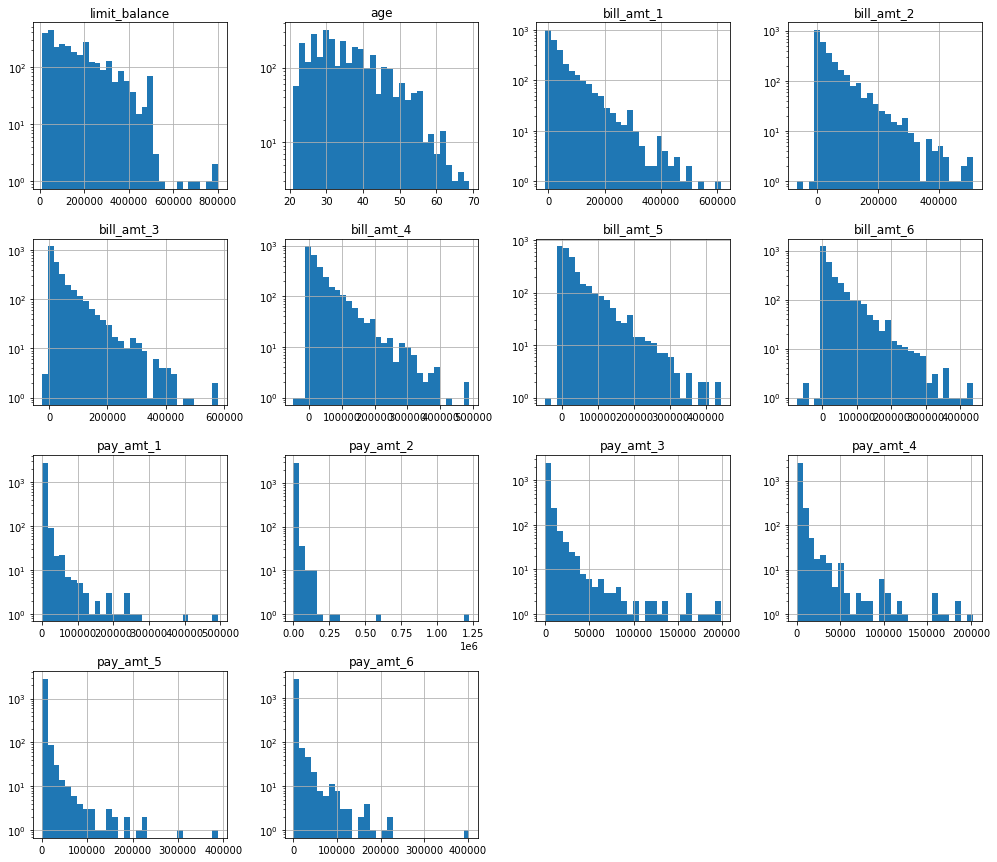

In [11]:
# Visualisasi data untuk kolom numerikal

fig = plt.figure(figsize=(17,15))
ax = fig.gca()
num.hist(bins=30, ax=ax, log=True)
plt.show()

Berdasarkan grafik di atas, dapat diketahui bahwa data pada dataset ini tidak terdistribusi secara normal dan lebih condong ke kanan, yang menunjukkan bahwa data tidak terdistribusi secara merata.

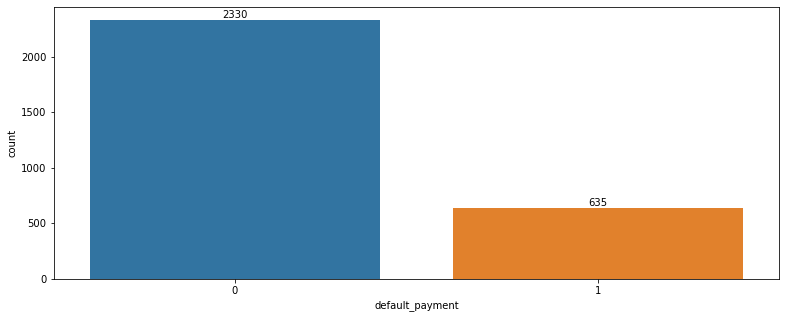

In [12]:
# Visualisasi data untuk kolom kategori

plt.figure(figsize = (13,5))
ax = sns.countplot(x='default_payment', data=data)
ax.bar_label(ax.containers[0])
plt.show()

Berdasarkan grafik, dapat diketahui bahwa sebanyak 2330 data merupakan kategori 'no' untuk default_payment dan 635 data merupakan kategori 'yes' untuk default_payment.

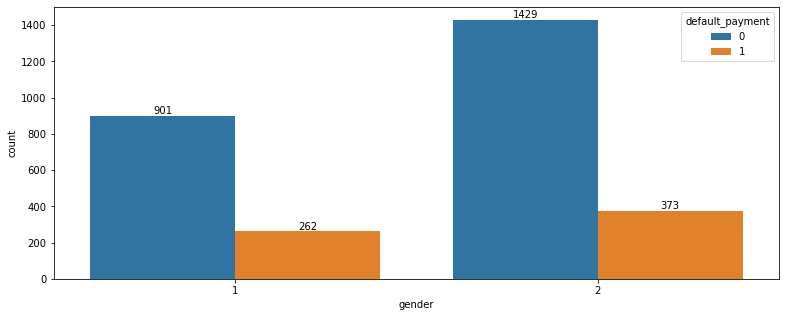

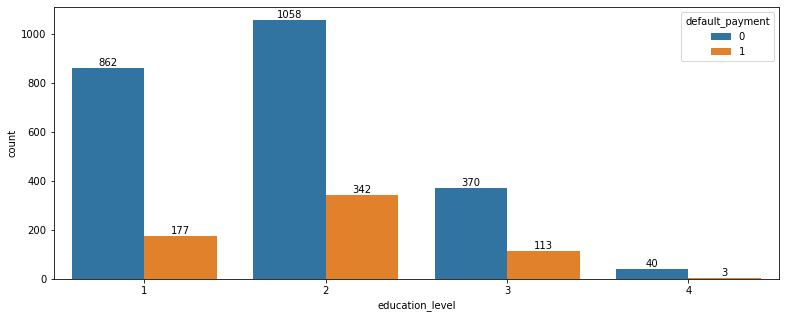

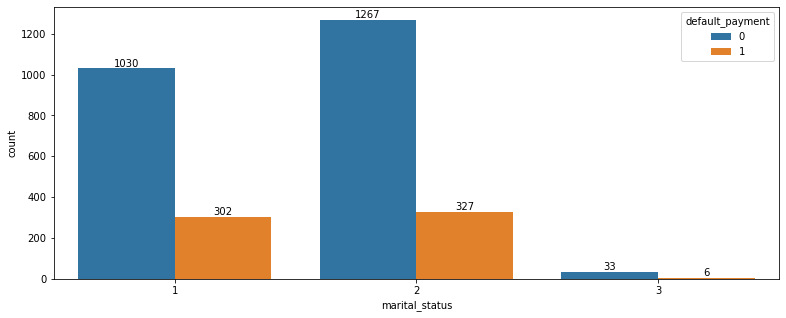

In [13]:
# Membuat fungsi untuk pembuatan countplot

def count_plot(variable,df):
    plt.figure(figsize = (13,5))
    ax = sns.countplot(x=variable, hue='default_payment', data=df)
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.show()

# Membuat grafik countplot

count_plot('gender', data)
count_plot('education_level', data)
count_plot('marital_status', data)

Berdasarkan grafik-grafik di atas, dapat diketahui bahwa untuk gender Male terdiri dari 901 data untuk kategori no dan 262 data untuk kategori yes. Sedangkan untuk gender Female, terdiri dari 1429 data kategori no dan 373 data kategori yes. Lalu untuk education level, kategori university adalah kategori yang paling banyak, dengan 1058 data untuk kategori no dan 342 data untuk kategori yes. Sedangkan untuk marital status, data didominasi oleh kategori single dengan jumlah 1267 data untuk kategori no dan 327 data untuk kategori yes.

<AxesSubplot:>

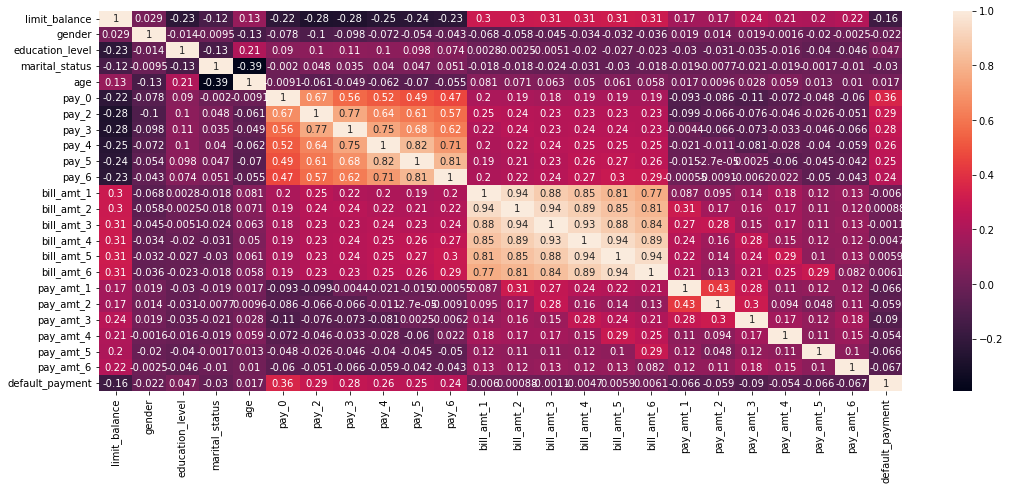

In [14]:
# Pembuatan heatmap untuk melihat korelasi antar variable

plt.figure(figsize = (18, 7))
sns.heatmap(data.corr(), annot = True)

Berdasarkan heatmap di atas, variable yang memiliki korelasi tinggi dengan 'default_payment' adalah:
- 'pay_0' dengan nilai 0.36
- 'pay_2' dengan nilai 0.29
- 'pay_3' dengan nilai 0.28
- 'pay_4' dengan nilai 0.26
- 'pay_5' dengan nilai 0.25
- 'pay_6' dengan nilai 0.24

## V. Data Preprocessing
Bagian ini berisi proses penyiapan data untuk proses pelatihan model. Data Preprocessing yang dilakukan adalah:
1. Get Data for Model Inference
2. Split between X (Features) and y (target)
3. Handling Data Outlier
4. Handling Missing Values
5. Feature Selection
6. Split between Numerical Columns and Categorical Columns
7. Feature Scaling
8. Feature Encoding
9. Concate between Numerical Columns and Categorical Columns

### V.1 Get Data for Model Inference

In [15]:
# Get Data for Model Inference

data_inf = data.sample(10, random_state = 17)
data_inf

,limit_balance,gender,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment
91,420000.0,2,2,2,32.0,0.0,0.0,0.0,0.0,0,...,198925.0,175684.0,164037.0,7300.0,8839.0,8000.0,5900.0,6000.0,6000.0,0
325,30000.0,2,2,2,25.0,2.0,0.0,0.0,0.0,0,...,12473.0,12623.0,27460.0,1200.0,1201.0,592.0,500.0,1500.0,0.0,1
47,40000.0,2,3,1,60.0,0.0,0.0,0.0,0.0,0,...,21058.0,8204.0,9899.0,2000.0,3000.0,3000.0,6000.0,2000.0,2000.0,0
1488,70000.0,2,3,3,39.0,0.0,0.0,-1.0,0.0,-1,...,15133.0,3148.0,4699.0,3000.0,11000.0,5000.0,3150.0,2000.0,4000.0,0
446,60000.0,2,2,2,24.0,-1.0,0.0,-1.0,0.0,0,...,10213.0,10000.0,11832.0,1020.0,9479.0,1000.0,200.0,1832.0,5889.0,0
567,300000.0,2,1,1,30.0,0.0,0.0,0.0,0.0,0,...,76244.0,67747.0,70389.0,3000.0,5000.0,2500.0,2500.0,3500.0,87000.0,1
1473,500000.0,1,1,2,43.0,0.0,0.0,0.0,-1.0,-1,...,3887.0,0.0,7413.0,22650.0,0.0,3887.0,0.0,7413.0,0.0,1
548,490000.0,2,2,1,30.0,0.0,0.0,0.0,0.0,0,...,16995.0,-1527.0,62491.0,2003.0,2041.0,1092.0,4.0,64895.0,3003.0,0
1768,80000.0,1,1,2,26.0,1.0,2.0,2.0,0.0,0,...,40793.0,42990.0,42854.0,2000.0,0.0,1603.0,3000.0,2000.0,1056.0,0
1781,130000.0,2,2,1,34.0,2.0,2.0,2.0,2.0,2,...,32336.0,34186.0,34588.0,2500.0,3000.0,0.0,2600.0,1000.0,1500.0,1


In [16]:
# Remove Inference-Set from Dataset

data_train_test = data.drop(data_inf.index)
data_train_test

,limit_balance,gender,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


In [17]:
# Reset Index

data_train_test.reset_index(drop = True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,limit_balance,gender,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment
0,420000.0,2,2,2,32.0,0.0,0.0,0.0,0.0,0,...,198925.0,175684.0,164037.0,7300.0,8839.0,8000.0,5900.0,6000.0,6000.0,0
1,30000.0,2,2,2,25.0,2.0,0.0,0.0,0.0,0,...,12473.0,12623.0,27460.0,1200.0,1201.0,592.0,500.0,1500.0,0.0,1
2,40000.0,2,3,1,60.0,0.0,0.0,0.0,0.0,0,...,21058.0,8204.0,9899.0,2000.0,3000.0,3000.0,6000.0,2000.0,2000.0,0
3,70000.0,2,3,3,39.0,0.0,0.0,-1.0,0.0,-1,...,15133.0,3148.0,4699.0,3000.0,11000.0,5000.0,3150.0,2000.0,4000.0,0
4,60000.0,2,2,2,24.0,-1.0,0.0,-1.0,0.0,0,...,10213.0,10000.0,11832.0,1020.0,9479.0,1000.0,200.0,1832.0,5889.0,0
5,300000.0,2,1,1,30.0,0.0,0.0,0.0,0.0,0,...,76244.0,67747.0,70389.0,3000.0,5000.0,2500.0,2500.0,3500.0,87000.0,1
6,500000.0,1,1,2,43.0,0.0,0.0,0.0,-1.0,-1,...,3887.0,0.0,7413.0,22650.0,0.0,3887.0,0.0,7413.0,0.0,1
7,490000.0,2,2,1,30.0,0.0,0.0,0.0,0.0,0,...,16995.0,-1527.0,62491.0,2003.0,2041.0,1092.0,4.0,64895.0,3003.0,0
8,80000.0,1,1,2,26.0,1.0,2.0,2.0,0.0,0,...,40793.0,42990.0,42854.0,2000.0,0.0,1603.0,3000.0,2000.0,1056.0,0
9,130000.0,2,2,1,34.0,2.0,2.0,2.0,2.0,2,...,32336.0,34186.0,34588.0,2500.0,3000.0,0.0,2600.0,1000.0,1500.0,1


### V.2 Split between 'X' (features) and 'y' (target)

In [18]:
# Split between 'X' (features) and 'y' (target)

X = data_train_test.drop('default_payment', axis=1)
y = data_train_test['default_payment']
X

,limit_balance,gender,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,28428.0,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0
2951,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,486.0,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0
2952,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,207.0,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0
2953,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0


In [19]:
# Split antara Train-Set dan Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)

print('Train Size   : ', X_train.shape)
print('Test Size    : ', X_test.shape )

Train Size   :  (2364, 23)
Test Size    :  (591, 23)


### V.3 Handling Data Outlier

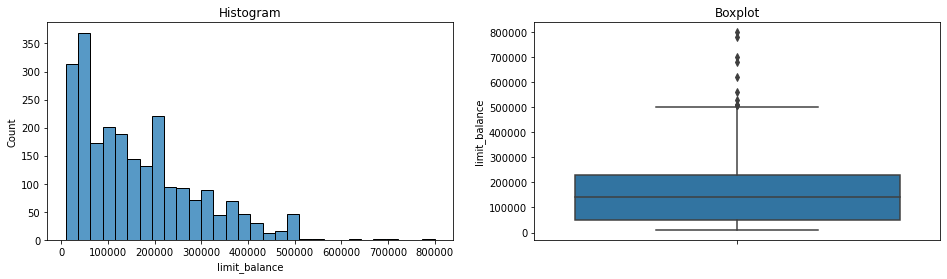


Skewness Value :  1.0213265650172134


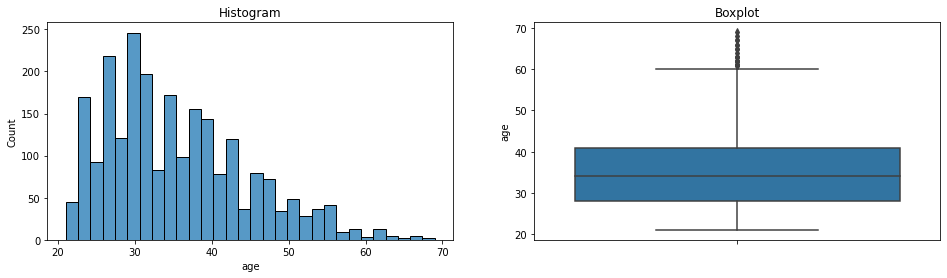


Skewness Value :  0.776893105045498


In [23]:
# Membuat fungsi untuk pembuatan grafik histogram dan boxplot

def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

# Mengecek apakah terdapat data outlier
diagnostic_plots(X_train, 'limit_balance')
print('\nSkewness Value : ', X_train['limit_balance'].skew())

diagnostic_plots(X_train, 'age')
print('\nSkewness Value : ', X_train['age'].skew())

In [24]:
# Membuat fungsi untuk menentukan data outlier

def outliers(df, var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1

    lower_boundary = Q1 - 1.5 * IQR
    upper_boundary = Q3 + 1.5 * IQR

    ls = df.index[(df[var] < lower_boundary) | (df[var] > upper_boundary)]

    return ls

In [25]:
# Menampilkan indeks yang terdapat data outlier

index_list = []
for i in ['limit_balance']:
    index_list.extend(outliers(X_train, 'limit_balance'))

for i in ['age']:
    index_list.extend(outliers(X_train, 'age'))
    
print(index_list)
print("\npersentase outlier: ", round((len(index_list)/len(X_train)*100),2),'%')

[161, 722, 2763, 1096, 372, 1199, 258, 2006, 2415, 2452, 189, 1165, 2672, 1683, 722, 2020, 2364, 2115, 890, 1168, 2100, 2292, 484, 916, 2313, 1371, 1412, 217, 319, 555, 258, 96, 1222, 1188, 2549]

persentase outlier:  1.48 %


In [26]:
# Persentase jumlah outlier dibandingkan data adalah 1.48%, maka data outlier bisa dihapus
# Membuat fungsi untuk menghapus data outlier

def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [27]:
# Menghapus data outlier

X_train_cln = remove(X_train, index_list)

print('Size dataset - Before trimming : ', X_train.shape)
print('Size dataset - After trimming  : ', X_train_cln.shape)

Size dataset - Before trimming :  (2364, 23)
Size dataset - After trimming  :  (2331, 23)


Limit Balance - After Trimming


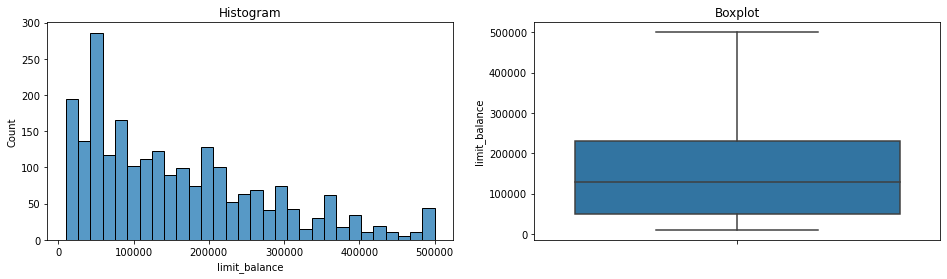


Skewness Value :  0.8925966156008021
Age - After Trimming


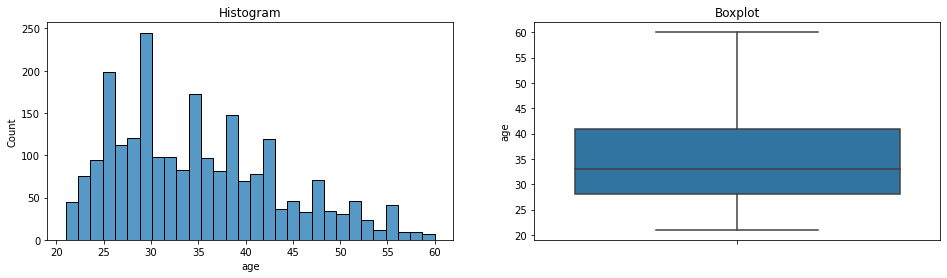


Skewness Value :  0.643636113384983


In [28]:
# Visualisasi data variable 'age' setelah outlier dihilangkan

print('Limit Balance - After Trimming')
diagnostic_plots(X_train_cln, 'limit_balance')
print('\nSkewness Value : ', X_train_cln['limit_balance'].skew())
print('Age - After Trimming')
diagnostic_plots(X_train_cln, 'age')
print('\nSkewness Value : ', X_train_cln['age'].skew())

In [29]:
# Menghapus indeks outlier pada y_train

y_train_cln = remove(y_train, index_list)

print('Size dataset - Before trimming : ', y_train.shape)
print('Size dataset - After trimming  : ', y_train_cln.shape)

Size dataset - Before trimming :  (2364,)
Size dataset - After trimming  :  (2331,)


In [30]:
y_train = y_train_cln.copy()

### V.4 Handling Missing Values


In [31]:
# Mengecek jumlah missing value pada X_train

X_train_cln.isnull().sum()

limit_balance      0
gender             0
education_level    0
marital_status     0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [32]:
# Mengecek jumlah missing value pada X_test

X_test.isnull().sum()

limit_balance      0
gender             0
education_level    0
marital_status     0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [33]:
# Mengecek jumlah missing value pada y_train

y_train.isnull().sum()

0

In [34]:
# Mengecek jumlah missing value pada y_test

y_test.isnull().sum()

0

Setelah dilakukan pengecekan, dapat diketahui bahwa tidak ada missing values pada dataset ini.

### V.5 Feature Selection

In [36]:
# Menampilkan data X_train

X_train_cln

,limit_balance,gender,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
810,120000.0,1,1,2,28.0,-1.0,0.0,0.0,0.0,0,...,47023.0,53576.0,57529.0,61392.0,35000.0,5000.0,8000.0,5000.0,5000.0,4000.0
2575,160000.0,2,2,1,41.0,1.0,-1.0,-1.0,-1.0,-1,...,1496.0,1496.0,1496.0,1496.0,1496.0,1496.0,1496.0,1496.0,1496.0,1496.0
366,100000.0,2,3,3,43.0,0.0,0.0,0.0,0.0,0,...,64448.0,38500.0,39469.0,40653.0,2464.0,1902.0,1378.0,1589.0,2000.0,1506.0
2622,170000.0,2,2,2,34.0,-1.0,-1.0,-1.0,-1.0,-1,...,1122.0,1692.0,648.0,0.0,1599.0,1122.0,1692.0,648.0,0.0,631.0
2891,110000.0,2,2,2,36.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,0.0,0.0,780.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,60000.0,2,1,2,25.0,0.0,0.0,0.0,2.0,2,...,27050.0,26317.0,28200.0,28762.0,1414.0,2678.0,0.0,2310.0,1173.0,0.0
406,150000.0,2,2,1,51.0,0.0,0.0,0.0,0.0,0,...,148393.0,149709.0,107862.0,108623.0,7000.0,7600.0,6000.0,4000.0,4100.0,4300.0
1414,20000.0,1,3,2,32.0,0.0,0.0,0.0,0.0,2,...,6369.0,6891.0,6635.0,7287.0,1092.0,1106.0,628.0,0.0,762.0,0.0
2191,350000.0,1,1,1,38.0,1.0,-2.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Berdasarkan heatmap di bagian EDA, variable yang memiliki korelasi tinggi dengan 'default_payment' adalah 'limit_balance', 'education_level', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'. Maka selain kolom-kolom tersebut, kolom-kolom lainnya akan dihapus.


In [37]:
# Menghapus kolom-kolom yang tidak digunakan pada X_train

X_train = X_train_cln[['limit_balance','education_level', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']]
X_train

,limit_balance,education_level,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
810,120000.0,1,28.0,-1.0,0.0,0.0,0.0,0,0,35000.0,5000.0,8000.0,5000.0,5000.0,4000.0
2575,160000.0,2,41.0,1.0,-1.0,-1.0,-1.0,-1,-1,1496.0,1496.0,1496.0,1496.0,1496.0,1496.0
366,100000.0,3,43.0,0.0,0.0,0.0,0.0,0,0,2464.0,1902.0,1378.0,1589.0,2000.0,1506.0
2622,170000.0,2,34.0,-1.0,-1.0,-1.0,-1.0,-1,-1,1599.0,1122.0,1692.0,648.0,0.0,631.0
2891,110000.0,2,36.0,1.0,-1.0,-1.0,-2.0,-2,-2,780.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,60000.0,1,25.0,0.0,0.0,0.0,2.0,2,2,1414.0,2678.0,0.0,2310.0,1173.0,0.0
406,150000.0,2,51.0,0.0,0.0,0.0,0.0,0,0,7000.0,7600.0,6000.0,4000.0,4100.0,4300.0
1414,20000.0,3,32.0,0.0,0.0,0.0,0.0,2,2,1092.0,1106.0,628.0,0.0,762.0,0.0
2191,350000.0,1,38.0,1.0,-2.0,-2.0,-2.0,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# Menghapus kolom-kolom yang tidak digunakan pada X_test

X_test = X_test[['limit_balance','education_level', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']]
X_test

,limit_balance,education_level,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
405,200000.0,2,35.0,0.0,0.0,0.0,0.0,0,0,2000.0,2000.0,2000.0,2000.0,1700.0,1600.0
2689,140000.0,2,42.0,-1.0,-1.0,-1.0,0.0,-1,-1,395.0,1204.0,0.0,748.0,0.0,2688.0
1517,360000.0,3,55.0,0.0,0.0,-1.0,-1.0,-1,-2,6015.0,17454.0,1775.0,0.0,0.0,0.0
39,20000.0,2,49.0,0.0,0.0,0.0,0.0,0,0,1543.0,1260.0,1270.0,594.0,617.0,1425.0
2096,150000.0,1,31.0,-2.0,-2.0,-2.0,-2.0,-2,-2,4268.0,0.0,1193.0,0.0,0.0,1956.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,360000.0,1,46.0,0.0,0.0,0.0,0.0,0,0,3005.0,3024.0,4004.0,4008.0,3008.0,2024.0
1944,340000.0,3,36.0,-1.0,2.0,2.0,-1.0,-1,2,8.0,0.0,35958.0,50000.0,0.0,10000.0
938,180000.0,2,34.0,0.0,0.0,0.0,0.0,0,0,1526.0,3006.0,5020.0,5000.0,2000.0,935.0
2934,280000.0,1,39.0,-1.0,-1.0,-1.0,-2.0,-2,-1,7614.0,2226.0,3008.0,1255.0,152446.0,0.0


### V.6 Split between Numerical Columns and Categorical Columns 

In [39]:
# Mendapatkan kolom numerikan dan kolom kategorikal

num_columns = X_train[['limit_balance', 'age', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']].columns.tolist()
cat_columns = X_train[['education_level', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']].columns.tolist()

print('Numerical Columns di X_train   : ', num_columns)
print('\nCategorical Columns di X_train : ', cat_columns)

num_columns1 = X_test[['limit_balance', 'age', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']].columns.tolist()
cat_columns1 = X_test[['education_level', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']].columns.tolist()

print('\nNumerical Columns di X_test    : ', num_columns1)
print('\nCategorical Columns di X_test  : ', cat_columns1)

Numerical Columns di X_train   :  ['limit_balance', 'age', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']

Categorical Columns di X_train :  ['education_level', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

Numerical Columns di X_test    :  ['limit_balance', 'age', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']

Categorical Columns di X_test  :  ['education_level', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


In [40]:
# Memisahkan Train-set dan Test-set berdasarkan tipe kolom

X_train_num = X_train_cln[num_columns]
X_train_cat = X_train_cln[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_test_num

,limit_balance,age,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
405,200000.0,35.0,2000.0,2000.0,2000.0,2000.0,1700.0,1600.0
2689,140000.0,42.0,395.0,1204.0,0.0,748.0,0.0,2688.0
1517,360000.0,55.0,6015.0,17454.0,1775.0,0.0,0.0,0.0
39,20000.0,49.0,1543.0,1260.0,1270.0,594.0,617.0,1425.0
2096,150000.0,31.0,4268.0,0.0,1193.0,0.0,0.0,1956.0
...,...,...,...,...,...,...,...,...
506,360000.0,46.0,3005.0,3024.0,4004.0,4008.0,3008.0,2024.0
1944,340000.0,36.0,8.0,0.0,35958.0,50000.0,0.0,10000.0
938,180000.0,34.0,1526.0,3006.0,5020.0,5000.0,2000.0,935.0
2934,280000.0,39.0,7614.0,2226.0,3008.0,1255.0,152446.0,0.0


### V.7 Feature Scaling
Pada bagian ini akan dilakukan scaling untuk kolom numerik. Scaling yang akan digunakan adalah MinMaxScaler, karena MinMaxScaler mempertahankan bentuk distribusi data aslinya. MinMaxScaler akan mengubah data berada di rentang 0 sampai 1.

In [41]:
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[2.24489796e-01, 1.79487179e-01, 8.64163391e-02, ...,
        2.47431659e-02, 1.28842403e-02, 9.91325898e-03],
       [3.06122449e-01, 5.12820513e-01, 3.69368124e-03, ...,
        7.40315525e-03, 3.85496468e-03, 3.70755886e-03],
       [1.83673469e-01, 5.64102564e-01, 6.08371027e-03, ...,
        7.86337813e-03, 5.15369610e-03, 3.73234201e-03],
       ...,
       [2.04081633e-02, 2.82051282e-01, 2.69618978e-03, ...,
        0.00000000e+00, 1.96355821e-03, 0.00000000e+00],
       [6.93877551e-01, 4.35897436e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.46938776e-01, 3.84615385e-01, 2.27151520e-04, ...,
        8.70959441e-03, 2.12847649e-03, 2.04708798e-03]])

### V.8 Concate between Numerical Columns and Categorical Columns

In [42]:
# Menggabungkan kolom numerikal dan kategorikal

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat], axis=1)
X_train_final

array([[ 2.24489796e-01,  1.79487179e-01,  8.64163391e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.06122449e-01,  5.12820513e-01,  3.69368124e-03, ...,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
       [ 1.83673469e-01,  5.64102564e-01,  6.08371027e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 2.04081633e-02,  2.82051282e-01,  2.69618978e-03, ...,
         0.00000000e+00,  2.00000000e+00,  2.00000000e+00],
       [ 6.93877551e-01,  4.35897436e-01,  0.00000000e+00, ...,
        -2.00000000e+00, -2.00000000e+00, -2.00000000e+00],
       [ 3.46938776e-01,  3.84615385e-01,  2.27151520e-04, ...,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00]])

In [43]:
# Membuat dataframe baru, X_train_final_df

X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + cat_columns])
X_train_final_df

,limit_balance,age,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,0.224490,0.179487,0.086416,0.016504,0.040159,0.024743,0.012884,0.009913,1.0,-1.0,0.0,0.0,0.0,0.0,0.0
1,0.306122,0.512821,0.003694,0.004938,0.007510,0.007403,0.003855,0.003708,2.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,0.183673,0.564103,0.006084,0.006278,0.006917,0.007863,0.005154,0.003732,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.326531,0.333333,0.003948,0.003703,0.008494,0.003207,0.000000,0.001564,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,0.204082,0.384615,0.001926,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,1.0,-1.0,-1.0,-2.0,-2.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326,0.102041,0.102564,0.003491,0.008839,0.000000,0.011431,0.003023,0.000000,1.0,0.0,0.0,0.0,2.0,2.0,2.0
2327,0.285714,0.769231,0.017283,0.025086,0.030119,0.019795,0.010565,0.010657,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2328,0.020408,0.282051,0.002696,0.003651,0.003152,0.000000,0.001964,0.000000,3.0,0.0,0.0,0.0,0.0,2.0,2.0
2329,0.693878,0.435897,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0


In [44]:
# Membuat dataframe baru, X_test_final_df

X_test_final_df = pd.DataFrame(X_test_final, columns=[num_columns + cat_columns])
X_test_final_df

,limit_balance,age,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,0.387755,0.358974,0.004938,0.006602,0.010040,0.009897,0.004381,0.003965,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.265306,0.538462,0.000975,0.003974,0.000000,0.003702,0.000000,0.006662,2.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0
2,0.714286,0.871795,0.014851,0.057611,0.008910,0.000000,0.000000,0.000000,3.0,0.0,0.0,-1.0,-1.0,-1.0,-2.0
3,0.020408,0.717949,0.003810,0.004159,0.006375,0.002939,0.001590,0.003532,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.285714,0.256410,0.010538,0.000000,0.005989,0.000000,0.000000,0.004848,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.714286,0.641026,0.007419,0.009981,0.020099,0.019834,0.007751,0.005016,1.0,0.0,0.0,0.0,0.0,0.0,0.0
587,0.673469,0.384615,0.000020,0.000000,0.180504,0.247432,0.000000,0.024783,3.0,-1.0,2.0,2.0,-1.0,-1.0,2.0
588,0.346939,0.333333,0.003768,0.009922,0.025200,0.024743,0.005154,0.002317,2.0,0.0,0.0,0.0,0.0,0.0,0.0
589,0.551020,0.461538,0.018799,0.007347,0.015100,0.006211,0.392830,0.000000,1.0,-1.0,-1.0,-1.0,-2.0,-2.0,-1.0


## VI. Model Definition
Bagian ini berisi cell untuk mendefinisikan model. Terdapat 7 model yang akan dipakai, yaitu:
- Logistic Regression
- SVM
- Decision Tree
- Random Forest
- KNN
- Naive Bayes
- Gradient Boosting

---
## 1. Logistic Regression

## VI.1 Model Definition

In [45]:
# Definisi Model Logistic Regression

model_log_reg = LogisticRegression()

## VII.1 Model Training

In [46]:
# Melakukan model training Logistic Regression

model_log_reg.fit(X_train_final, y_train)

LogisticRegression()

## VIII.1 Model Evaluation

In [47]:
# Melakukan prediksi pada train-set dan test-set dengan logistic regression

y_pred_train = model_log_reg.predict(X_train_final)
y_pred_test = model_log_reg.predict(X_test_final)

#Data y_pred_train

y_pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
# Melihat akurasi dari train-set dan test-set

print('accuracy score train : ',accuracy_score(y_train,y_pred_train))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test))

accuracy score train :  0.833976833976834
accuracy score test :  0.8307952622673435


In [49]:
# Classification report pada data train

print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1827
           1       0.76      0.34      0.47       504

    accuracy                           0.83      2331
   macro avg       0.80      0.65      0.68      2331
weighted avg       0.82      0.83      0.81      2331



In [50]:
# Classification report pada data test

print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       469
           1       0.74      0.28      0.40       122

    accuracy                           0.83       591
   macro avg       0.79      0.63      0.65       591
weighted avg       0.82      0.83      0.80       591



In [51]:
# Menampikan data cross validation

mean_LR = cross_val_score(model_log_reg, X_train_final, y_train, cv=5).mean()
std_LR = cross_val_score(model_log_reg, X_train_final, y_train, cv=5).std()
print(mean_LR)
print(std_LR)

0.8326860335811637
0.01256007513717216


Berdasarkan data di atas, dapat diketahui bahwa model Logistic Regression yang dibuat mendapatkan akurasi 97% pada saat memprediksi kategori '0' (no default payment) dan mendapatkan akurasi 34% pada saat memprediksi kategori '1' (yes default payment). Secara keseluruhan data train memiliki akurasi 83%. Sedangkan untuk data test, model yang dibuat mendapatkan akurasi 97% untuk memprediksi kategori '0' (no default payment) dan 28% untuk memprediksi kategori '1' (yes default payment). Dan secara keseluruhan data test memiliki akurasi 83%.

---
## 2. SVM

## VI.2 Model Definition

In [52]:
# Definisi Model SVM

model_SVM = SVC()

## VII.2 Model Training

In [53]:
# Melakukan model training SVM

model_SVM.fit(X_train_final, y_train)

SVC()

## VIII.2 Model Evaluation

In [54]:
# Melakukan prediksi pada train-set dan test-set dengan SVM

y_pred_train1 = model_SVM.predict(X_train_final)
y_pred_test1 = model_SVM.predict(X_test_final)

#Data y_pred_train

y_pred_train1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
# Melihat akurasi dari train-set dan test-set

print('accuracy score train : ',accuracy_score(y_train,y_pred_train1))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test1))

accuracy score train :  0.8485628485628486
accuracy score test :  0.8291032148900169


In [56]:
# Classification report pada data train

print(classification_report(y_train,y_pred_train1))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1827
           1       0.76      0.44      0.55       504

    accuracy                           0.85      2331
   macro avg       0.81      0.70      0.73      2331
weighted avg       0.84      0.85      0.83      2331



In [57]:
# Classification report pada data test

print(classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       469
           1       0.66      0.36      0.47       122

    accuracy                           0.83       591
   macro avg       0.75      0.66      0.68       591
weighted avg       0.81      0.83      0.81       591



In [58]:
# Menampikan data cross validation

mean_SVM = cross_val_score(model_SVM, X_train_final, y_train, cv=5).mean()
std_SVM = cross_val_score(model_SVM, X_train_final, y_train, cv=5).std()
print(mean_SVM)
print(std_SVM)

0.8408396209942011
0.016655311134720414


Berdasarkan data di atas, dapat diketahui bahwa model SVM yang dibuat mendapatkan akurasi 96% pada saat memprediksi kategori '0' (no default payment) dan mendapatkan akurasi 44% pada saat memprediksi kategori '1' (yes default payment). Secara keseluruhan data train memiliki akurasi 85%. Sedangkan untuk data test, model yang dibuat mendapatkan akurasi 95% untuk memprediksi kategori '0' (no default payment) dan 36% untuk memprediksi kategori '1' (yes default payment). Dan secara keseluruhan data test memiliki akurasi 83%.

---
## 3. Decision Tree

## VI.3 Model Definition

In [59]:
# Definisi Model Decision Tree

model_DT = DecisionTreeClassifier()

## VII.3 Model Training

In [60]:
# Melakukan model training Decision Tree

model_DT.fit(X_train_final,y_train)

DecisionTreeClassifier()

## VIII.3 Model Evaluation

In [61]:
# Melakukan prediksi pada train-set dan test-set dengan Decision Tree

y_pred_train2 = model_DT.predict(X_train_final)
y_pred_test2 = model_DT.predict(X_test_final)

#Data y_pred_train

y_pred_train2

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
# Melihat akurasi dari train-set dan test-set

print('accuracy score train : ',accuracy_score(y_train,y_pred_train2))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test2))

accuracy score train :  0.9995709995709996
accuracy score test :  0.7055837563451777


In [63]:
# Classification report pada data train

print(classification_report(y_train,y_pred_train2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1827
           1       1.00      1.00      1.00       504

    accuracy                           1.00      2331
   macro avg       1.00      1.00      1.00      2331
weighted avg       1.00      1.00      1.00      2331



In [64]:
# Classification report pada data test

print(classification_report(y_test,y_pred_test2))

              precision    recall  f1-score   support

           0       0.84      0.77      0.81       469
           1       0.34      0.44      0.38       122

    accuracy                           0.71       591
   macro avg       0.59      0.61      0.59       591
weighted avg       0.74      0.71      0.72       591



In [65]:
pd.DataFrame(index=X_train_final_df.columns,data=model_DT.feature_importances_,columns=['Feature Importance'])

,Feature Importance
limit_balance,0.075760
age,0.101368
pay_amt_1,0.102241
pay_amt_2,0.072883
pay_amt_3,0.051108
pay_amt_4,0.064577
pay_amt_5,0.067703
pay_amt_6,0.073801
education_level,0.044787
pay_0,0.230282


In [66]:
# Menampikan data cross validation

mean_DT = cross_val_score(model_DT, X_train_final, y_train, cv=5).mean()
std_DT = cross_val_score(model_DT, X_train_final, y_train, cv=5).std()
print(mean_DT)
print(std_DT)

0.7262951356020991
0.0268191917393527


Berdasarkan data di atas, dapat diketahui bahwa model Decision Tree yang dibuat mendapatkan akurasi 100% pada saat memprediksi kategori '0' (no default payment) dan mendapatkan akurasi 100% pada saat memprediksi kategori '1' (yes default payment). Secara keseluruhan data train memiliki akurasi 100%. Sedangkan untuk data test, model yang dibuat mendapatkan akurasi 77% untuk memprediksi kategori '0' (no default payment) dan 44% untuk memprediksi kategori '1' (yes default payment). Dan secara keseluruhan data test memiliki akurasi 71%.

---
## 4. Random Forest

## VI.4 Model Definition

In [67]:
# Definisi Model Random Forest

model_RF = RandomForestClassifier(random_state=5)

## VII.4 Model Training

In [68]:
# Melakukan model training Random Forest

model_RF.fit(X_train_final,y_train)

RandomForestClassifier(random_state=5)

## VIII.4 Model Evaluation

In [69]:
# Melakukan prediksi pada train-set dan test-set dengan Random Forest

y_pred_train3 = model_RF.predict(X_train_final)
y_pred_test3 = model_RF.predict(X_test_final)

#Data y_pred_train

y_pred_train3

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
# Melihat akurasi dari train-set dan test-set

print('accuracy score train : ',accuracy_score(y_train,y_pred_train3))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test3))

accuracy score train :  0.9995709995709996
accuracy score test :  0.8223350253807107


In [71]:
# Classification report pada data train

print(classification_report(y_train,y_pred_train3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1827
           1       1.00      1.00      1.00       504

    accuracy                           1.00      2331
   macro avg       1.00      1.00      1.00      2331
weighted avg       1.00      1.00      1.00      2331



In [72]:
# Classification report pada data test

print(classification_report(y_test,y_pred_test3))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       469
           1       0.61      0.39      0.47       122

    accuracy                           0.82       591
   macro avg       0.73      0.66      0.68       591
weighted avg       0.80      0.82      0.81       591



In [73]:
pd.DataFrame(index=X_train_final_df.columns,data=model_RF.feature_importances_,columns=['Feature Importance'])

,Feature Importance
limit_balance,0.085985
age,0.092275
pay_amt_1,0.079527
pay_amt_2,0.076677
pay_amt_3,0.073472
pay_amt_4,0.069389
pay_amt_5,0.073787
pay_amt_6,0.073633
education_level,0.029349
pay_0,0.130493


In [74]:
# Menampilkan data cross validation

mean_RF = cross_val_score(model_RF, X_train_final, y_train, cv=5).mean()
std_RF = cross_val_score(model_RF, X_train_final, y_train, cv=5).std()
print(mean_RF)
print(std_RF)

0.8275367380136199
0.01931223433258637


Berdasarkan data di atas, dapat diketahui bahwa model Random Forest yang dibuat mendapatkan akurasi 100% pada saat memprediksi kategori '0' (no default payment) dan mendapatkan akurasi 100% pada saat memprediksi kategori '1' (yes default payment). Secara keseluruhan data train memiliki akurasi 100%. Sedangkan untuk data test, model yang dibuat mendapatkan akurasi 94% untuk memprediksi kategori '0' (no default payment) dan 39% untuk memprediksi kategori '1' (yes default payment). Dan secara keseluruhan data test memiliki akurasi 82%.

---
## 5. KNN

## VI.5 Model Definition

In [75]:
# Definisi Model KNN

model_KNN = KNeighborsClassifier()

## VII.5 Model Training

In [76]:
# Melakukan model training KNN

model_KNN.fit(X_train_final,y_train)

KNeighborsClassifier()

## VIII.5 Model Evaluation

In [77]:
# Melakukan prediksi pada train-set dan test-set dengan KNN

y_pred_train4 = model_KNN.predict(X_train_final)
y_pred_test4 = model_KNN.predict(X_test_final)

#Data y_pred_train

y_pred_train4

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
# Melihat akurasi dari train-set dan test-set

print('accuracy score train : ',accuracy_score(y_train,y_pred_train4))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test4))

accuracy score train :  0.8567138567138567
accuracy score test :  0.8121827411167513


In [79]:
# Classification report pada data train

print(classification_report(y_train,y_pred_train4))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1827
           1       0.75      0.50      0.60       504

    accuracy                           0.86      2331
   macro avg       0.81      0.73      0.76      2331
weighted avg       0.85      0.86      0.85      2331



In [80]:
# Classification report pada data test

print(classification_report(y_test,y_pred_test4))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       469
           1       0.57      0.37      0.45       122

    accuracy                           0.81       591
   macro avg       0.71      0.65      0.67       591
weighted avg       0.79      0.81      0.80       591



In [82]:
# Menampilkan data cross validation

mean_KNN = cross_val_score(model_KNN, X_train_final, y_train, cv=5).mean()
std_KNN = cross_val_score(model_KNN, X_train_final, y_train, cv=5).std()
print(mean_KNN)
print(std_KNN)

0.8215309113968257
0.015609559547353869


Berdasarkan data di atas, dapat diketahui bahwa model KNN yang dibuat mendapatkan akurasi 95% pada saat memprediksi kategori '0' (no default payment) dan mendapatkan akurasi 50% pada saat memprediksi kategori '1' (yes default payment). Secara keseluruhan data train memiliki akurasi 86%. Sedangkan untuk data test, model yang dibuat mendapatkan akurasi 93% untuk memprediksi kategori '0' (no default payment) dan 37% untuk memprediksi kategori '1' (yes default payment). Dan secara keseluruhan data test memiliki akurasi 81%.

---
## 6. Naive Bayes

## VI.6 Model Definition

In [83]:
# Definisi Model Naive Bayes

model_NB = GaussianNB()

## VII.6 Model Training

In [84]:
# Melakukan model training Naive Bayes

model_NB.fit(X_train_final,y_train)

GaussianNB()

## VIII.6 Model Evaluation

In [85]:
# Melakukan prediksi pada train-set dan test-set dengan Naive Bayes

y_pred_train5 = model_NB.predict(X_train_final)
y_pred_test5 = model_NB.predict(X_test_final)

#Data y_pred_train

y_pred_train5

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [86]:
# Melihat akurasi dari train-set dan test-set

print('accuracy score train : ',accuracy_score(y_train,y_pred_train5))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test5))

accuracy score train :  0.47533247533247536
accuracy score test :  0.47884940778341795


In [87]:
# Classification report pada data train

print(classification_report(y_train,y_pred_train5))

              precision    recall  f1-score   support

           0       0.90      0.37      0.53      1827
           1       0.27      0.85      0.41       504

    accuracy                           0.48      2331
   macro avg       0.58      0.61      0.47      2331
weighted avg       0.76      0.48      0.50      2331



In [88]:
# Classification report pada data test

print(classification_report(y_test,y_pred_test5))

              precision    recall  f1-score   support

           0       0.89      0.39      0.54       469
           1       0.26      0.81      0.39       122

    accuracy                           0.48       591
   macro avg       0.57      0.60      0.47       591
weighted avg       0.76      0.48      0.51       591



In [89]:
# Menampilkan data cross validation

mean_NB = cross_val_score(model_NB, X_train_final, y_train, cv=5).mean()
std_NB = cross_val_score(model_NB, X_train_final, y_train, cv=5).std()
print(mean_NB)
print(std_NB)

0.47192379446930915
0.0393941087777364


Berdasarkan data di atas, dapat diketahui bahwa model Naive Bayes yang dibuat mendapatkan akurasi 37% pada saat memprediksi kategori '0' (no default payment) dan mendapatkan akurasi 85% pada saat memprediksi kategori '1' (yes default payment). Secara keseluruhan data train memiliki akurasi 48%. Sedangkan untuk data test, model yang dibuat mendapatkan akurasi 39% untuk memprediksi kategori '0' (no default payment) dan 81% untuk memprediksi kategori '1' (yes default payment). Dan secara keseluruhan data test memiliki akurasi 48%.

---
## 7. Gradient Boosting

## VI.7 Model Definition

In [90]:
# Definisi Model Gradient Boosting

model_GB = GradientBoostingClassifier()

## VII.7 Model Training

In [91]:
# Melakukan model training Gradient Boosting

model_GB.fit(X_train_final,y_train)

GradientBoostingClassifier()

## VIII.7 Model Evaluation

In [92]:
# Melakukan prediksi pada train-set dan test-set dengan Gradient Boosting

y_pred_train6 = model_GB.predict(X_train_final)
y_pred_test6 = model_GB.predict(X_test_final)

#Data y_pred_train

y_pred_train6

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [93]:
# Melihat akurasi dari train-set dan test-set

print('accuracy score train : ',accuracy_score(y_train,y_pred_train6))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test6))

accuracy score train :  0.8674388674388674
accuracy score test :  0.8291032148900169


In [94]:
# Classification report pada data train

print(classification_report(y_train,y_pred_train6))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1827
           1       0.83      0.48      0.61       504

    accuracy                           0.87      2331
   macro avg       0.85      0.73      0.77      2331
weighted avg       0.86      0.87      0.85      2331



In [95]:
# Classification report pada data test

print(classification_report(y_test,y_pred_test6))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       469
           1       0.64      0.39      0.48       122

    accuracy                           0.83       591
   macro avg       0.75      0.66      0.69       591
weighted avg       0.81      0.83      0.81       591



In [96]:
# Menampilkan data cross validation

mean_GB = cross_val_score(model_GB, X_train_final, y_train, cv=5).mean()
std_GB = cross_val_score(model_GB, X_train_final, y_train, cv=5).std()
print(mean_GB)
print(std_GB)

0.8344027717785887
0.015469534826246065


Berdasarkan data di atas, dapat diketahui bahwa model Gradient Boosting yang dibuat mendapatkan akurasi 97% pada saat memprediksi kategori '0' (no default payment) dan mendapatkan akurasi 48% pada saat memprediksi kategori '1' (yes default payment). Secara keseluruhan data train memiliki akurasi 87%. Sedangkan untuk data test, model yang dibuat mendapatkan akurasi 94% untuk memprediksi kategori '0' (no default payment) dan 39% untuk memprediksi kategori '1' (yes default payment). Dan secara keseluruhan data test memiliki akurasi 83%.

---

In [97]:
# Membuat tabel cross validation

cv = {'model': ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes', 'Gradient Boosting'],
      'mean': [mean_LR, mean_SVM, mean_DT, mean_RF, mean_KNN, mean_NB, mean_GB],
      'standard deviation': [std_LR, std_SVM, std_DT, std_RF, std_KNN, std_NB, std_GB]}

data_cv = pd.DataFrame(cv)
data_cv.sort_values('mean', ascending=False)

,model,mean,standard deviation
1,SVM,0.840840,0.016655
6,Gradient Boosting,0.834403,0.015470
0,Logistic Regression,0.832686,0.012560
3,Random Forest,0.827537,0.019312
4,KNN,0.821531,0.015610
2,Decision Tree,0.726295,0.026819
5,Naive Bayes,0.471924,0.039394


Berdasarkan data cross validation di atas, model dengan nilai mean tertinggi adalah model SVM dengan  nilai sekitar 0.840840, maka model yang akan dilakukan hyperparameter tuning dengan Grid Search adalah SVM.

In [98]:
# Menyiapkan parameter untuk grid search

parameter = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [99]:
# Melakukan grid search

grid_search = GridSearchCV(SVC(), parameter, cv=5)
grid_search.fit(X_train_final, y_train)
print("Hasil parameter terbaik:", grid_search.best_params_)

Hasil parameter terbaik: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [100]:
parameter_new = grid_search.best_estimator_
parameter_new

SVC(C=1, gamma=0.1)

In [101]:
# Melakukan prediksi pada train-set dan test-set dengan parameter baru

y_pred_train7 = parameter_new.predict(X_train_final)
y_pred_test7 = parameter_new.predict(X_test_final)

#Data y_pred_train

y_pred_train7

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [102]:
# Membandingkan akurasi dari train-set dan test-set

print('Sebelum hyperparameter tuning')
print('accuracy score train : ',accuracy_score(y_train,y_pred_train1))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test1))
print('\nSetelah hyperparameter tuning')
print('accuracy score train : ',accuracy_score(y_train,y_pred_train7))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test7))

Sebelum hyperparameter tuning
accuracy score train :  0.8485628485628486
accuracy score test :  0.8291032148900169

Setelah hyperparameter tuning
accuracy score train :  0.8502788502788503
accuracy score test :  0.8307952622673435


---

In [103]:
# Save file untuk data inference

with open('model_log_reg.pkl', 'wb') as file_1:
    joblib.dump(model_log_reg, file_1)

with open('model_SVM.pkl', 'wb') as file_2:
    joblib.dump(model_SVM, file_2)

with open('model_DT.pkl', 'wb') as file_3:
    joblib.dump(model_DT, file_3)

with open('model_RF.pkl', 'wb') as file_4:
    joblib.dump(model_RF, file_4)

with open('model_KNN.pkl', 'wb') as file_5:
    joblib.dump(model_KNN, file_5)

with open('model_NB.pkl', 'wb') as file_6:
    joblib.dump(model_NB, file_6)

with open('model_GB.pkl', 'wb') as file_7:
    joblib.dump(model_GB, file_7)
    
with open('model_scaler.pkl', 'wb') as file_8:
    joblib.dump(scaler, file_8)

with open('list_num_cols.txt', 'w') as file_9:
    json.dump(num_columns, file_9)

with open('list_cat_columns.txt', 'w') as file_10:
    json.dump(cat_columns, file_10)

## IX. Model Inference

In [104]:
# Mengakses file yang telah di-save untuk data inference

with open('model_log_reg.pkl', 'rb') as file_1:
    model_log_reg = joblib.load(file_1)

with open('model_SVM.pkl', 'rb') as file_2:
    model_SVM = joblib.load(file_2)

with open('model_DT.pkl', 'rb') as file_3:
    model_DT = joblib.load(file_3)

with open('model_RF.pkl', 'rb') as file_4:
    model_RF = joblib.load(file_4)

with open('model_KNN.pkl', 'rb') as file_5:
    model_KNN = joblib.load(file_5)

with open('model_NB.pkl', 'rb') as file_6:
    model_KNN = joblib.load(file_6)

with open('model_GB.pkl', 'rb') as file_7:
    model_GB = joblib.load(file_7)

with open('model_scaler.pkl', 'rb') as file_8:
    model_scaler = joblib.load(file_8)

with open('list_num_cols.txt', 'r') as file_9:
    list_num_cols = json.load(file_9)

with open('list_cat_columns.txt', 'rb') as file_10:
    list_cat_columns = json.load(file_10)

In [105]:
# Menampilkan data inference-set

data_inf

,limit_balance,gender,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment
0,420000.0,2,2,2,32.0,0.0,0.0,0.0,0.0,0,...,198925.0,175684.0,164037.0,7300.0,8839.0,8000.0,5900.0,6000.0,6000.0,0
1,30000.0,2,2,2,25.0,2.0,0.0,0.0,0.0,0,...,12473.0,12623.0,27460.0,1200.0,1201.0,592.0,500.0,1500.0,0.0,1
2,40000.0,2,3,1,60.0,0.0,0.0,0.0,0.0,0,...,21058.0,8204.0,9899.0,2000.0,3000.0,3000.0,6000.0,2000.0,2000.0,0
3,70000.0,2,3,3,39.0,0.0,0.0,-1.0,0.0,-1,...,15133.0,3148.0,4699.0,3000.0,11000.0,5000.0,3150.0,2000.0,4000.0,0
4,60000.0,2,2,2,24.0,-1.0,0.0,-1.0,0.0,0,...,10213.0,10000.0,11832.0,1020.0,9479.0,1000.0,200.0,1832.0,5889.0,0
5,300000.0,2,1,1,30.0,0.0,0.0,0.0,0.0,0,...,76244.0,67747.0,70389.0,3000.0,5000.0,2500.0,2500.0,3500.0,87000.0,1
6,500000.0,1,1,2,43.0,0.0,0.0,0.0,-1.0,-1,...,3887.0,0.0,7413.0,22650.0,0.0,3887.0,0.0,7413.0,0.0,1
7,490000.0,2,2,1,30.0,0.0,0.0,0.0,0.0,0,...,16995.0,-1527.0,62491.0,2003.0,2041.0,1092.0,4.0,64895.0,3003.0,0
8,80000.0,1,1,2,26.0,1.0,2.0,2.0,0.0,0,...,40793.0,42990.0,42854.0,2000.0,0.0,1603.0,3000.0,2000.0,1056.0,0
9,130000.0,2,2,1,34.0,2.0,2.0,2.0,2.0,2,...,32336.0,34186.0,34588.0,2500.0,3000.0,0.0,2600.0,1000.0,1500.0,1


In [106]:
# Memisahkan antara Kolom Numerikal dan Kolom Kategorikal

data_inf_num = data_inf[list_num_cols]
data_inf_cat = data_inf[list_cat_columns]

# Data data_inf_num

data_inf_num

,limit_balance,age,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,420000.0,32.0,7300.0,8839.0,8000.0,5900.0,6000.0,6000.0
1,30000.0,25.0,1200.0,1201.0,592.0,500.0,1500.0,0.0
2,40000.0,60.0,2000.0,3000.0,3000.0,6000.0,2000.0,2000.0
3,70000.0,39.0,3000.0,11000.0,5000.0,3150.0,2000.0,4000.0
4,60000.0,24.0,1020.0,9479.0,1000.0,200.0,1832.0,5889.0
5,300000.0,30.0,3000.0,5000.0,2500.0,2500.0,3500.0,87000.0
6,500000.0,43.0,22650.0,0.0,3887.0,0.0,7413.0,0.0
7,490000.0,30.0,2003.0,2041.0,1092.0,4.0,64895.0,3003.0
8,80000.0,26.0,2000.0,0.0,1603.0,3000.0,2000.0,1056.0
9,130000.0,34.0,2500.0,3000.0,0.0,2600.0,1000.0,1500.0


In [107]:
# Data data_inf_cat

data_inf_cat

,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,2,0.0,0.0,0.0,0.0,0,0
1,2,2.0,0.0,0.0,0.0,0,0
2,3,0.0,0.0,0.0,0.0,0,0
3,3,0.0,0.0,-1.0,0.0,-1,0
4,2,-1.0,0.0,-1.0,0.0,0,0
5,1,0.0,0.0,0.0,0.0,0,0
6,1,0.0,0.0,0.0,-1.0,-1,-1
7,2,0.0,0.0,0.0,0.0,0,-1
8,1,1.0,2.0,2.0,0.0,0,0
9,2,2.0,2.0,2.0,2.0,2,2


In [108]:
# Feature Scaling dan Feature Encoding

data_inf_num_scaled = model_scaler.transform(data_inf_num)

# Menampilkan data yang telah di-scaling

data_inf_num_scaled

array([[8.36734694e-01, 2.82051282e-01, 1.80239793e-02, 2.91753724e-02,
        4.01588282e-02, 2.91969358e-02, 1.54610883e-02, 1.48698885e-02],
       [4.08163265e-02, 1.02564103e-01, 2.96284591e-03, 3.96420661e-03,
        2.97175328e-03, 2.47431659e-03, 3.86527208e-03, 0.00000000e+00],
       [6.12244898e-02, 1.00000000e+00, 4.93807652e-03, 9.90226465e-03,
        1.50595606e-02, 2.96917991e-02, 5.15369610e-03, 4.95662949e-03],
       [1.22448980e-01, 4.61538462e-01, 7.40711478e-03, 3.63083037e-02,
        2.50992676e-02, 1.55881945e-02, 5.15369610e-03, 9.91325898e-03],
       [1.02040816e-01, 7.69230769e-02, 2.51841903e-03, 3.12878555e-02,
        5.01985352e-03, 9.89726638e-04, 4.72078563e-03, 1.45947955e-02],
       [5.91836735e-01, 2.30769231e-01, 7.40711478e-03, 1.65037744e-02,
        1.25496338e-02, 1.23715830e-02, 9.01896818e-03, 2.15613383e-01],
       [1.00000000e+00, 5.64102564e-01, 5.59237166e-02, 0.00000000e+00,
        1.95121706e-02, 0.00000000e+00, 1.91021746e-02, 0.

In [109]:
# Menggabungkan Kolom Numerikal dan Kolom Kategorikal

data_inf_final = np.concatenate ([data_inf_num_scaled, data_inf_cat], axis=1)
data_inf_final

array([[ 8.36734694e-01,  2.82051282e-01,  1.80239793e-02,
         2.91753724e-02,  4.01588282e-02,  2.91969358e-02,
         1.54610883e-02,  1.48698885e-02,  2.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.08163265e-02,  1.02564103e-01,  2.96284591e-03,
         3.96420661e-03,  2.97175328e-03,  2.47431659e-03,
         3.86527208e-03,  0.00000000e+00,  2.00000000e+00,
         2.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.12244898e-02,  1.00000000e+00,  4.93807652e-03,
         9.90226465e-03,  1.50595606e-02,  2.96917991e-02,
         5.15369610e-03,  4.95662949e-03,  3.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.22448980e-01,  4.61538462e-01,  7.40711478e-03,
         3.63083037e-02,  2.50992676e-02,  1.55881945

In [110]:
# Melakukan prediksi dengan Logistic Regression

y_pred_inf = model_log_reg.predict(data_inf_final)
y_pred_inf

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [111]:
# Membuat dataframe hasil prediksi Logistic Regression

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns= ['default_payment LR'])
y_pred_inf_df

,default_payment LR
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,1


In [112]:
# Melakukan prediksi dengan SVM

y_pred_inf1 = model_SVM.predict(data_inf_final)
y_pred_inf1

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [113]:
# Membuat dataframe hasil prediksi SVM

y_pred_inf1_df = pd.DataFrame(y_pred_inf1, columns= ['default_payment SVM'])
y_pred_inf1_df

,default_payment SVM
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,1


In [114]:
# Melakukan prediksi dengan Decision Tree

y_pred_inf2 = model_DT.predict(data_inf_final)
y_pred_inf2

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [115]:
# Membuat dataframe hasil prediksi decision tree

y_pred_inf2_df = pd.DataFrame(y_pred_inf2, columns= ['default_payment DT'])
y_pred_inf2_df

,default_payment DT
0,0
1,1
2,1
3,0
4,0
5,0
6,1
7,0
8,0
9,1


In [116]:
# Melakukan prediksi dengan Random Forest

y_pred_inf3 = model_RF.predict(data_inf_final)
y_pred_inf3

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [117]:
# Membuat dataframe hasil prediksi random forest

y_pred_inf3_df = pd.DataFrame(y_pred_inf3, columns= ['default_payment RF'])
y_pred_inf3_df

,default_payment RF
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,1


In [118]:
# Melakukan prediksi dengan KNN

y_pred_inf4 = model_KNN.predict(data_inf_final)
y_pred_inf4

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [119]:
# Membuat dataframe hasil prediksi KNN

y_pred_inf4_df = pd.DataFrame(y_pred_inf4, columns= ['default_payment KNN'])
y_pred_inf4_df

,default_payment KNN
0,0
1,1
2,1
3,0
4,1
5,0
6,0
7,0
8,1
9,1


In [120]:
# Melakukan prediksi dengan Naive Bayes

y_pred_inf5 = model_NB.predict(data_inf_final)
y_pred_inf5

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [121]:
# Membuat dataframe hasil prediksi Naive Bayes

y_pred_inf5_df = pd.DataFrame(y_pred_inf5, columns= ['default_payment NB'])
y_pred_inf5_df

,default_payment NB
0,0
1,1
2,1
3,0
4,1
5,0
6,0
7,0
8,1
9,1


In [122]:
# Melakukan prediksi dengan Gradient Boosting

y_pred_inf6 = model_GB.predict(data_inf_final)
y_pred_inf6

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [123]:
# Membuat dataframe hasil prediksi Gradient Boosting

y_pred_inf6_df = pd.DataFrame(y_pred_inf6, columns= ['default_payment GB'])
y_pred_inf6_df

,default_payment GB
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,1


In [124]:
# Menggabungkan data inference-set dengan default payment prediction

df_akhir = pd.concat([data_inf, y_pred_inf_df, y_pred_inf1_df, y_pred_inf2_df, y_pred_inf3_df, y_pred_inf4_df, y_pred_inf5_df, y_pred_inf6_df], axis=1)
df_akhir

,limit_balance,gender,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,pay_amt_5,pay_amt_6,default_payment,default_payment LR,default_payment SVM,default_payment DT,default_payment RF,default_payment KNN,default_payment NB,default_payment GB
0,420000.0,2,2,2,32.0,0.0,0.0,0.0,0.0,0,...,6000.0,6000.0,0,0,0,0,0,0,0,0
1,30000.0,2,2,2,25.0,2.0,0.0,0.0,0.0,0,...,1500.0,0.0,1,1,1,1,1,1,1,1
2,40000.0,2,3,1,60.0,0.0,0.0,0.0,0.0,0,...,2000.0,2000.0,0,0,0,1,0,1,1,0
3,70000.0,2,3,3,39.0,0.0,0.0,-1.0,0.0,-1,...,2000.0,4000.0,0,0,0,0,0,0,0,0
4,60000.0,2,2,2,24.0,-1.0,0.0,-1.0,0.0,0,...,1832.0,5889.0,0,0,0,0,0,1,1,0
5,300000.0,2,1,1,30.0,0.0,0.0,0.0,0.0,0,...,3500.0,87000.0,1,0,0,0,0,0,0,0
6,500000.0,1,1,2,43.0,0.0,0.0,0.0,-1.0,-1,...,7413.0,0.0,1,0,0,1,0,0,0,0
7,490000.0,2,2,1,30.0,0.0,0.0,0.0,0.0,0,...,64895.0,3003.0,0,0,0,0,0,0,0,0
8,80000.0,1,1,2,26.0,1.0,2.0,2.0,0.0,0,...,2000.0,1056.0,0,0,0,0,0,1,1,0
9,130000.0,2,2,1,34.0,2.0,2.0,2.0,2.0,2,...,1000.0,1500.0,1,1,1,1,1,1,1,1


## X. Pengambilan Kesimpulan

Berdasarkan data di atas, dapat disimpulkan bahwa:
- Dataset ini terdiri dari 2965 baris dan 24 kolom, serta tidak memiliki missing value.
- Variable yang memiliki korelasi tinggi dengan 'default_payment' adalah 'pay_0' dengan nilai 0.36, 'pay_2' dengan nilai 0.29, 'pay_3' dengan nilai 0.28, 'pay_4' dengan nilai 0.26, 'pay_5' dengan nilai 0.25, dan 'pay_6' dengan nilai 0.24.
- Model Logistic Regression yang dibuat memiliki nilai akurasi untuk train dan test sebesar 83%.
- Model SVM yang dibuat memiliki nilai akurasi untuk data train sebesar 85% dan untuk data test sebesar 82%.
- Model Decision Tree yang dibuat memiliki nilai akurasi untuk data train sebesar 100% dan untuk data test sebesar 70%.
- Model Random Forest yang dibuat memiliki nilai akurasi untuk data train sebesar 100% dan untuk data test sebesar 82%.
- Model KNN yang dibuat memiliki nilai akurasi untuk data train sebesar 86% dan untuk data test sebesar 81%.
- Model Naive Bayes yang dibuat memiliki nilai akurasi untuk data train sebesar 47% dan untuk data test sebesar 47%.
- Model Gradient Boosting yang dibuat memiliki nilai akurasi untuk data train sebesar 87% dan untuk data test sebesar 83%.
- Berdasarkan hasil cross validation, model yang memiliki nilai mean tertinggi adalah SVM, dengan nilai 0.840840.
- Setelah dilakukan grid search pada model SVM, ditemukan parameter terbaiknya adalah 'C': 1, 'gamma': 0.1, 'kernel': 'rbf'. Dan setelah dilakukan prediksi dengan parameter terbaik, nilai akurasi untuk model SVM meningkat sebanyak 1%, dari 84% dan 82% menjadi 85% dan 83%.
- Berdasarkan hasil pengujian, diketahui terdapat perbedaan antara nilai aktual default_payment dengan nilai prediksi default_payment. Hal ini bisa disebabkan oleh tingkat keakurasian yang kurang dan adanya kesalahan dalam penentuan variabel independen dan variabel dependen yang digunakan untuk analisis dan model yang akan saya rekomendasikan adalah Logistic Regression, karena memiliki tingkat akurasi pada train dan test yang mirip dan memiliki gap yang sedikit.

---
## Conceptual Problems
1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!

    Criterion adalah sebuah parameter pada Decision Tree yang digunakan untuk memisahkan atribut. Masing-masing criterion yang dipilih, harus dapat mengoptimalkan nilai split dari decision tree. Macam-macam criterion adalah:
    - Information_gain, digunakan untuk menghitung entropi dari semua atribut dan yang memiliki nilai entropi paling sedikit dipilih untuk dipisah. Criterion ini memiliki bias terhadap pemilihan atribut yang memiliki jumlah nilai yang besar.
    - Gain_ratio, digunakan untuk melakukan penyesuaian informasi untuk setiap atribut, untuk memungkinkan luas dan keseragaman atribut.
    - Gini_index, digunakan untuk mengukur ketidaksetaraan antara distribusi karakteristik label. Pemisahan pada atribut yang dipilih menghasilkan pengurangan indeks gini rata-rata dari himpunan bagian yang dihasilkan.
    - Akurasi, digunakan untuk memilih atribut yang akan dipisahkan yang dapat memaksimalkan akurasi seluruh tree.
    - Least_square, digunakan untuk memilih atribut untuk dipecah, yang meminimalkan jarak kuadrat antara rata-rata nilai dalam node sehubungan dengan nilai sebenarnya.
    <p> </p>
2. Apakah fungsi dari pruning pada Tree model?

   Fungsi pruning adalah untuk mengidentifikasi dan membuang cabang yang tidak diperlukan pada pohon yang telah terbentuk. Decision tree yang dikonstruksi dapat berukuran besar, maka dapat disederhanakan dengan melakukan pemangkasan berdasarkan nilai confident level. Selain itu pruning juga bertujuan untuk mengurangi tingkat kesalahan prediksi pada kasus baru dari hasil pemecahan yang dilakukan dengan divide and conquer.

3. Bagaimana cara memilih K yang optimal pada KNN?

   Penentuan nilai K pada KNN tidak ada rumus yang pasti. Umumnya, jika jumlah kelasnya genap, Data Scientist akan memilih bilangan ganjil untuk nilai K dan sebaliknya jika jumlah kelasnya ganjil, maka nilai K adalah bilangan genap. Selain itu, cara untuk memilih nilai K secara optimal adalah dengan menggunakan Elbow Method.

4. Jelaskan apa yang kalian ketahui tentang Cross Validation!

   Cross Validation (CV) adalah suatu metode statistik yang dapat digunakan untuk mengevaluasi kinerja model atau algoritma, dimana data dipisahkan menjadi dua subset, yaitu data proses pembelajaran dan data validasi/evaluasi. Penggunaan cross validation dapat mengurangi waktu komputasi dengan tetap menjaga keakuratan estimasi.
    
5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!
    
   Accuracy, Precision, Recall, dan F1 Score merupakan bagian dari Confusion Matrix. 
   - Accuracy menggambarkan seberapa akurat model dalam mengklasifikasikan dengan benar.
   - Precision menggambarkan akurasi antara data yang diminta dengan hasil prediksi yang diberikan oleh model.
   - Recall menggambarkan keberhasilan model dalam menemukan kembali sebuah informasi.
   - F1 Score menggambarkan perbandingan antara rata-rata precision dan recall yang dibobotkan.